In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.shape

(13320, 9)

In [4]:
df.isna().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df = df.drop(['area_type','society','balcony','availability'], axis = 'columns')

df.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [6]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df.shape

(13246, 5)

In [8]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [10]:
df = df.drop(['size'], axis = "columns")

In [11]:
df.head(20)

location total_sqft  bath   price  bhk
0   Electronic City Phase II       1056   2.0   39.07    2
1           Chikka Tirupathi       2600   5.0  120.00    4
2                Uttarahalli       1440   2.0   62.00    3
3         Lingadheeranahalli       1521   3.0   95.00    3
4                   Kothanur       1200   2.0   51.00    2
5                 Whitefield       1170   2.0   38.00    2
6           Old Airport Road       2732   4.0  204.00    4
7               Rajaji Nagar       3300   4.0  600.00    4
8               Marathahalli       1310   3.0   63.25    3
9               Gandhi Bazar       1020   6.0  370.00    6
10                Whitefield       1800   2.0   70.00    3
11                Whitefield       2785   5.0  295.00    4
12        7th Phase JP Nagar       1000   2.0   38.00    2
13                 Gottigere       1100   2.0   40.00    2
14                  Sarjapur       2250   3.0  148.00    3
15               Mysore Road       1175   2.0   73.50    2
16             Bisuvanahalli       1180   3.0   48.00    3
17     Raja Rajeshwari Nagar       1540   3.0   60.00    3
18     Ramakrishnappa Layout       2770   4.0  290.00    3
19        Manayata Tech Park       1100   2.0   48.00    2

In [12]:
 df.shape

(13246, 5)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df[~df['total_sqft'].apply(is_float)]

location   total_sqft  bath    price  bhk
30              Yelahanka  2100 - 2850   4.0  186.000    4
122                Hebbal  3067 - 8156   4.0  477.000    4
137    8th Phase JP Nagar  1042 - 1105   2.0   54.005    2
165              Sarjapur  1145 - 1340   2.0   43.490    2
188              KR Puram  1015 - 1540   2.0   56.800    2
...                   ...          ...   ...      ...  ...
12975          Whitefield   850 - 1060   2.0   38.190    2
12990      Talaghattapura  1804 - 2273   3.0  122.000    3
13059              Harlur  1200 - 1470   2.0   72.760    2
13265               Hoodi  1133 - 1384   2.0   59.135    2
13299          Whitefield  2830 - 2882   5.0  154.500    4

[190 rows x 5 columns]

In [15]:
df.head()


location total_sqft  bath   price  bhk
0  Electronic City Phase II       1056   2.0   39.07    2
1          Chikka Tirupathi       2600   5.0  120.00    4
2               Uttarahalli       1440   2.0   62.00    3
3        Lingadheeranahalli       1521   3.0   95.00    3
4                  Kothanur       1200   2.0   51.00    2

In [16]:
df.shape

(13246, 5)

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2.0
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [19]:
df.shape

(13246, 5)

In [20]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)

In [21]:
df.head()

location  total_sqft  bath   price  bhk
0  Electronic City Phase II      1056.0   2.0   39.07    2
1          Chikka Tirupathi      2600.0   5.0  120.00    4
2               Uttarahalli      1440.0   2.0   62.00    3
3        Lingadheeranahalli      1521.0   3.0   95.00    3
4                  Kothanur      1200.0   2.0   51.00    2

In [22]:
df.shape

(13246, 5)

In [23]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head(30)

location  total_sqft  bath   price  bhk  price_per_sqft
0   Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1           Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2                Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3         Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                   Kothanur      1200.0   2.0   51.00    2     4250.000000
5                 Whitefield      1170.0   2.0   38.00    2     3247.863248
6           Old Airport Road      2732.0   4.0  204.00    4     7467.057101
7               Rajaji Nagar      3300.0   4.0  600.00    4    18181.818182
8               Marathahalli      1310.0   3.0   63.25    3     4828.244275
9               Gandhi Bazar      1020.0   6.0  370.00    6    36274.509804
10                Whitefield      1800.0   2.0   70.00    3     3888.888889
11                Whitefield      2785.0   5.0  295.00    4    10592.459605
12        7th Phase JP Nagar      1000.0   2.0   38.00    2     3800.000000
13                 Gottigere      1100.0   2.0   40.00    2     3636.363636
14                  Sarjapur      2250.0   3.0  148.00    3     6577.777778
15               Mysore Road      1175.0   2.0   73.50    2     6255.319149
16             Bisuvanahalli      1180.0   3.0   48.00    3     4067.796610
17     Raja Rajeshwari Nagar      1540.0   3.0   60.00    3     3896.103896
18     Ramakrishnappa Layout      2770.0   4.0  290.00    3    10469.314079
19        Manayata Tech Park      1100.0   2.0   48.00    2     4363.636364
20                   Kengeri       600.0   1.0   15.00    1     2500.000000
21                Binny Pete      1755.0   3.0  122.00    3     6951.566952
22               Thanisandra      2800.0   5.0  380.00    4    13571.428571
23                 Bellandur      1767.0   3.0  103.00    3     5829.088851
24               Thanisandra       510.0   1.0   25.25    1     4950.980392
25           Mangammanapalya      1250.0   3.0   56.00    3     4480.000000
26           Electronic City       660.0   1.0   23.10    2     3500.000000
27                Whitefield      1610.0   3.0   81.00    3     5031.055901
28          Ramagondanahalli      1151.0   2.0   48.77    2     4237.185056
29           Electronic City      1025.0   2.0   47.00    3     4585.365854

In [24]:
df.shape

(13246, 6)

In [25]:
df.location = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)

location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [26]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [27]:
df.location =df.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [28]:
df.head(30)

location  total_sqft  bath   price  bhk  price_per_sqft
0   Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1           Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2                Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3         Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                   Kothanur      1200.0   2.0   51.00    2     4250.000000
5                 Whitefield      1170.0   2.0   38.00    2     3247.863248
6           Old Airport Road      2732.0   4.0  204.00    4     7467.057101
7               Rajaji Nagar      3300.0   4.0  600.00    4    18181.818182
8               Marathahalli      1310.0   3.0   63.25    3     4828.244275
9                      other      1020.0   6.0  370.00    6    36274.509804
10                Whitefield      1800.0   2.0   70.00    3     3888.888889
11                Whitefield      2785.0   5.0  295.00    4    10592.459605
12        7th Phase JP Nagar      1000.0   2.0   38.00    2     3800.000000
13                 Gottigere      1100.0   2.0   40.00    2     3636.363636
14                  Sarjapur      2250.0   3.0  148.00    3     6577.777778
15               Mysore Road      1175.0   2.0   73.50    2     6255.319149
16             Bisuvanahalli      1180.0   3.0   48.00    3     4067.796610
17     Raja Rajeshwari Nagar      1540.0   3.0   60.00    3     3896.103896
18                     other      2770.0   4.0  290.00    3    10469.314079
19                     other      1100.0   2.0   48.00    2     4363.636364
20                   Kengeri       600.0   1.0   15.00    1     2500.000000
21                Binny Pete      1755.0   3.0  122.00    3     6951.566952
22               Thanisandra      2800.0   5.0  380.00    4    13571.428571
23                 Bellandur      1767.0   3.0  103.00    3     5829.088851
24               Thanisandra       510.0   1.0   25.25    1     4950.980392
25                     other      1250.0   3.0   56.00    3     4480.000000
26           Electronic City       660.0   1.0   23.10    2     3500.000000
27                Whitefield      1610.0   3.0   81.00    3     5031.055901
28          Ramagondanahalli      1151.0   2.0   48.77    2     4237.185056
29           Electronic City      1025.0   2.0   47.00    3     4585.365854

In [29]:
unusual_home = df[df.total_sqft/df.bhk<300].head()
unusual_home.head()

location  total_sqft  bath  price  bhk  price_per_sqft
9                 other      1020.0   6.0  370.0    6    36274.509804
45           HSR Layout       600.0   9.0  200.0    8    33333.333333
58        Murugeshpalya      1407.0   4.0  150.0    6    10660.980810
68  Devarachikkanahalli      1350.0   7.0   85.0    8     6296.296296
70                other       500.0   3.0  100.0    3    20000.000000

In [30]:
unusual_home.shape

(5, 6)

In [31]:
df = df[~(df.total_sqft/df.bhk < 300)]
df.shape

(12502, 6)

In [32]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
df.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  12456.000000  12502.000000  12502.000000  12502.000000    12456.000000
mean    1590.189927      2.564790    111.311915      2.650696     6308.502826
std     1260.404795      1.084946    152.089966      0.981698     4168.127339
min      300.000000      1.000000      9.000000      1.000000      267.829813
25%     1115.000000      2.000000     49.000000      2.000000     4210.526316
50%     1300.000000      2.000000     70.000000      3.000000     5294.117647
75%     1700.000000      3.000000    115.000000      3.000000     6916.666667
max    52272.000000     16.000000   3600.000000     16.000000   176470.588235

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10241, 6)

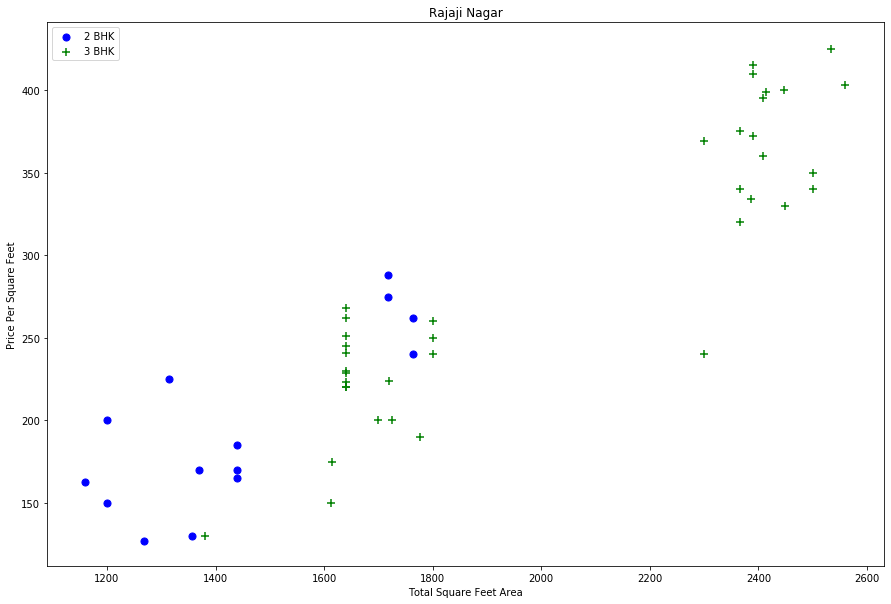

In [35]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location)&(df.bhk == 2)]
    bhk3 = df[(df.location == location)&(df.bhk == 3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+', color='green', label = '3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df, "Rajaji Nagar")

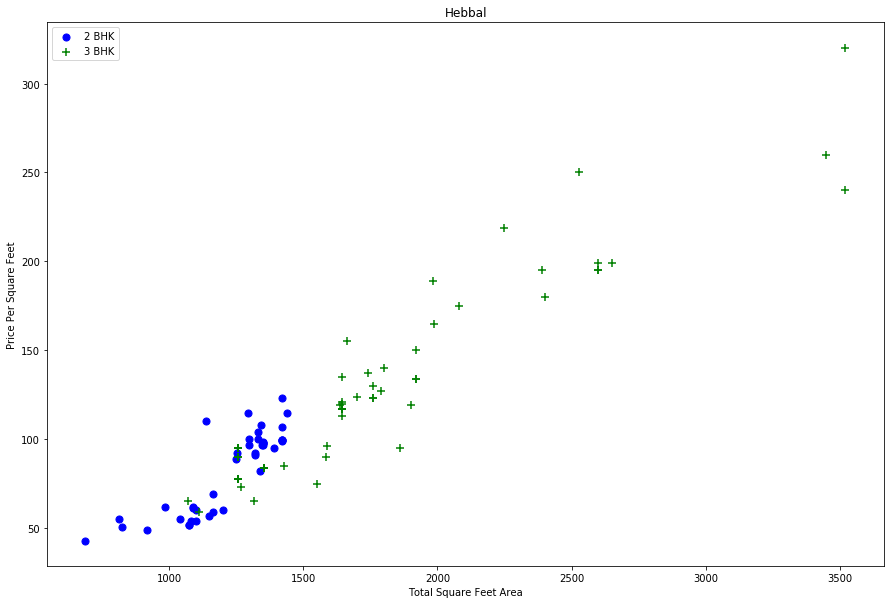

In [36]:
 plot_scatter_chart(df, "Hebbal")

Now we can remove those 2BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1BHK apartment 

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment( with same square ft area). what we will do is for a given location we will build a dictonary of stats per bhk.i.e

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis = 'index')



In [38]:
df = remove_bhk_outliers(df)
df.shape

(7329, 6)

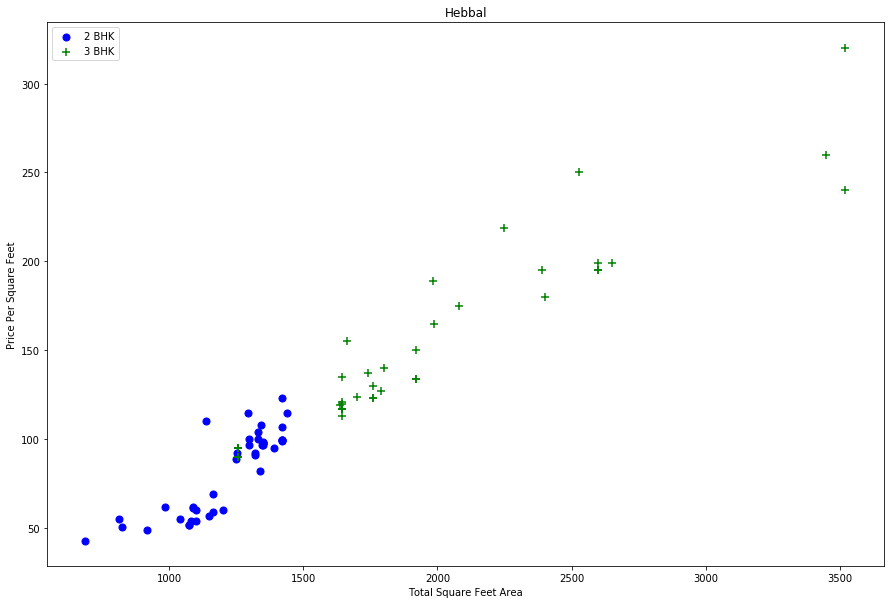

In [39]:
 plot_scatter_chart(df, "Hebbal")

Text(0, 0.5, 'Count')

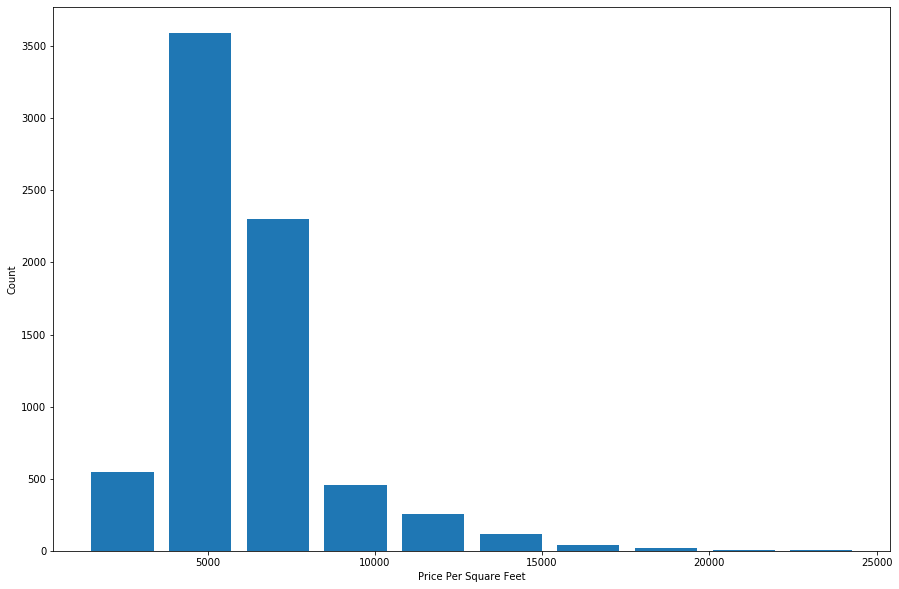

In [40]:
plt.hist(df.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df[df.bath>10]

location  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar      4000.0  12.0  160.0   10     4000.000000
8486           other     12000.0  12.0  525.0   10     4375.000000
8575           other     10000.0  16.0  550.0   16     5500.000000
9308           other      6000.0  12.0  150.0   11     2500.000000
9639           other      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'Count')

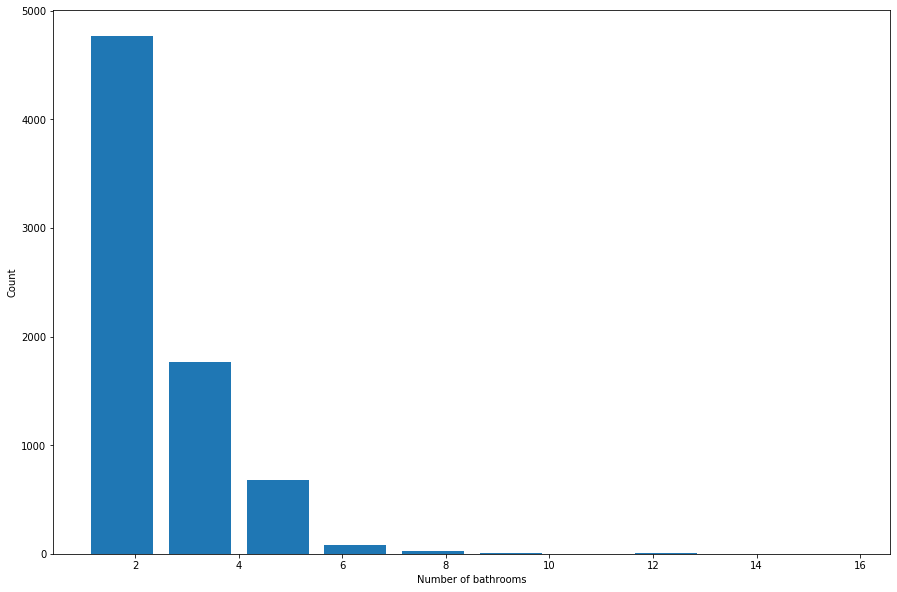

In [42]:
plt.hist(df.bath, rwidth = 0.8 )
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df = df[df.bath-df.bhk < 2]

In [44]:
df.shape

(7251, 6)

In [45]:
df = df.drop(['price_per_sqft'], axis = 'columns')

In [46]:
df.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [47]:
df.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [48]:
dummies = pd.get_dummies(df.location)

In [49]:
df_final = pd.concat([df,  dummies.drop('other', axis = 'columns')], axis = 'columns')
df_final.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

In [50]:
df_final = df_final.drop('location', axis = 'columns')
df_final.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4      1235.0   2.0  148.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [51]:
df_final.shape

(7251, 245)

In [52]:
 X = df_final.drop('price', axis = 'columns')
X.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   
3      1200.0   2.0    3                    1                   0   
4      1235.0   2.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 244 columns]

In [53]:
X.shape

(7251, 244)

In [54]:
y = df_final.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=10)



In [56]:
from sklearn.linear_model import LinearRegression

lr_mdl = LinearRegression()
lr_mdl.fit(X_train, y_train)
lr_mdl.score(X_test,y_test)

0.8452277697874312

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size =0.2, random_state =0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [59]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params': {
                'alpha': [ 1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params' :  {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items() :
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_scores' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score  \
0  linear_regression         NaN   
1              lasso         NaN   
2      decision_tree         NaN   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

In [60]:
X.columns
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]


5

In [61]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_mdl.predict([x])[0]

In [62]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677179224

In [63]:
predict_price('Indira Nagar', 1000, 3, 3)

184.5843020203347

In [89]:
import pickle

with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_mdl, f)

In [90]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))